
 Comparison of Manifold Learning methods

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.



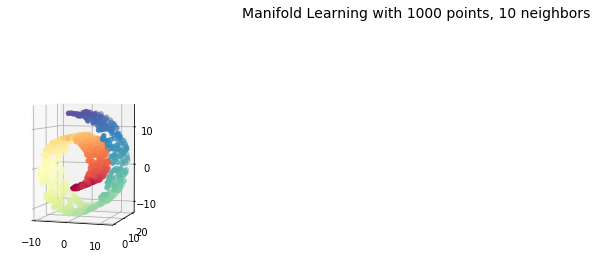

In [1]:
"""
=========================================
 Comparison of Manifold Learning methods
=========================================

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.
"""

# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

plt.show() 


[[ 0.1129529   0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.08402471  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.09984038 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.109685    0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.10544441  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.08495346]]
[[ 1.    0.    0.16 ...,  0.    0.    0.08]
 [ 0.    1.    0.   ...,  0.    0.    0.66]
 [ 0.16  0.    1.   ...,  0.    0.    0.12]
 ..., 
 [ 0.    0.    0.   ...,  1.    0.06  0.  ]
 [ 0.    0.    0.   ...,  0.06  1.    0.  ]
 [ 0.08  0.66  0.12 ...,  0.    0.    1.  ]]
[[  9.87241643e-01   0.00000000e+00  -1.80436166e-03 ...,   0.00000000e+00
    0.00000000e+00  -7.67659131e-04]
 [  0.00000000e+00   9.92939848e-01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00  -4.71120540e-03]
 [ -1.80436166e-

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


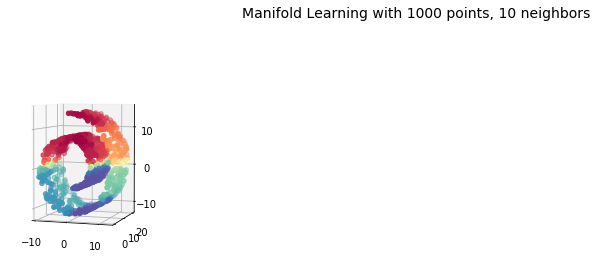

In [4]:
plt.figure()
t0 = time()
mf = manifold.ManifoldForest(num_trees=50, depth=5, num_options=20, num_features=3)
Y = mf.fit_transform(X, 1)
# print(W)
# tsne = manifold.SpectralEmbedding(n_components=1, affinity='precomputed', random_state=0)
# Y = tsne.fit_transform(W)
t1 = time()
print("Manifold forests & t-SNE: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

plt.show() 

In [3]:
Y

array([[ 0.02587567+0.j],
       [ 0.03546970+0.j],
       [ 0.02891761+0.j],
       [ 0.02583029+0.j],
       [-0.03414553+0.j],
       [ 0.02720837+0.j],
       [-0.03431032+0.j],
       [-0.02929184+0.j],
       [-0.03646306+0.j],
       [-0.03333085+0.j],
       [ 0.02277442+0.j],
       [ 0.02951217+0.j],
       [ 0.02951217+0.j],
       [-0.03089608+0.j],
       [ 0.03570489+0.j],
       [ 0.03570489+0.j],
       [ 0.03536083+0.j],
       [ 0.01769691+0.j],
       [ 0.02221871+0.j],
       [-0.02672531+0.j],
       [-0.03682028+0.j],
       [ 0.02199669+0.j],
       [-0.03419254+0.j],
       [ 0.02216763+0.j],
       [ 0.03286620+0.j],
       [ 0.02612762+0.j],
       [ 0.03371208+0.j],
       [-0.03494531+0.j],
       [ 0.02534808+0.j],
       [-0.03428936+0.j],
       [-0.03793724+0.j],
       [ 0.02565791+0.j],
       [-0.03330945+0.j],
       [ 0.02584805+0.j],
       [ 0.03269354+0.j],
       [ 0.02951217+0.j],
       [ 0.02951217+0.j],
       [ 0.02951217+0.j],
       [-0.0